In [ ]:
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)
uploaded=files.upload()


Populating the interactive namespace from numpy and matplotlib


Saving train.csv to train (2).csv


In [ ]:
wal=pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
wal

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
#1지점 1부서 데이터만 사용
wal=wal.iloc[0:143,:]

In [ ]:
wal.index=wal['Date']
wal=wal.iloc[:,3]
wal

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
                ...   
2012-09-28    18947.81
2012-10-05    21904.47
2012-10-12    22764.01
2012-10-19    24185.27
2012-10-26    27390.81
Name: Weekly_Sales, Length: 143, dtype: float64

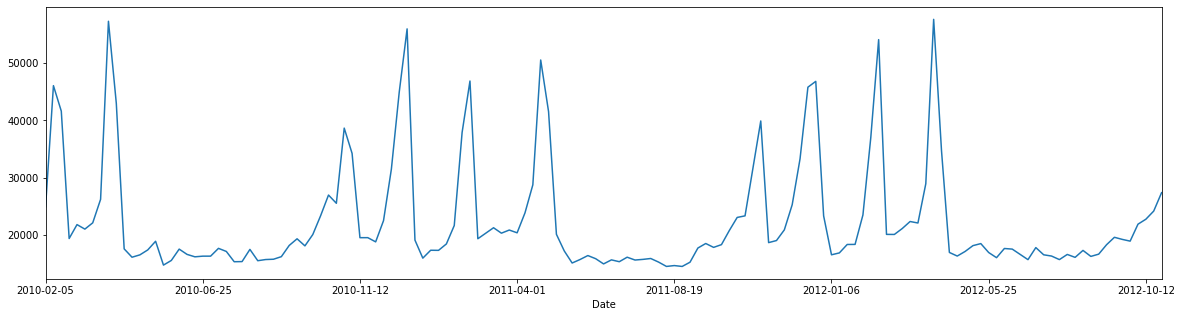

In [ ]:
wal.plot(figsize=(20, 5))

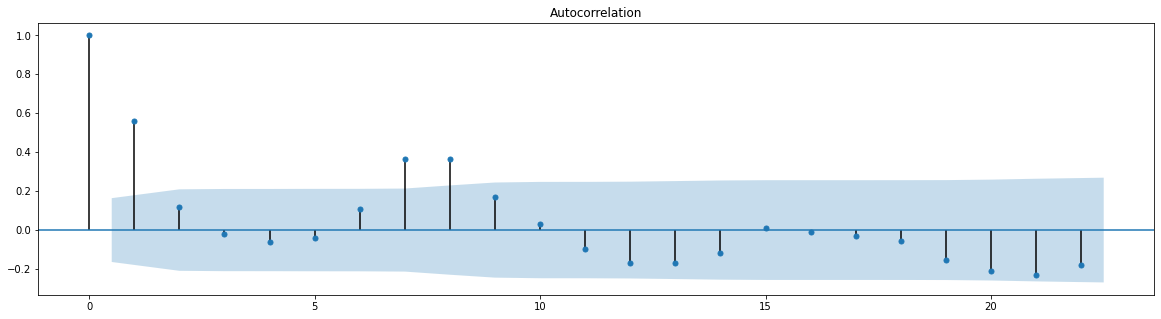

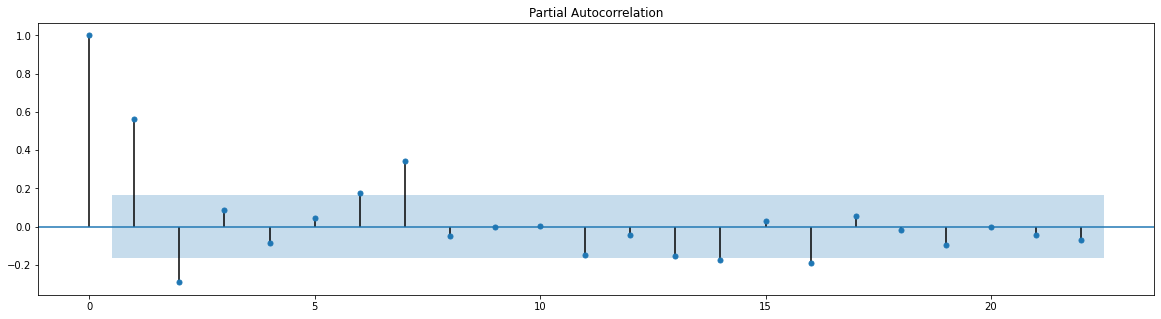

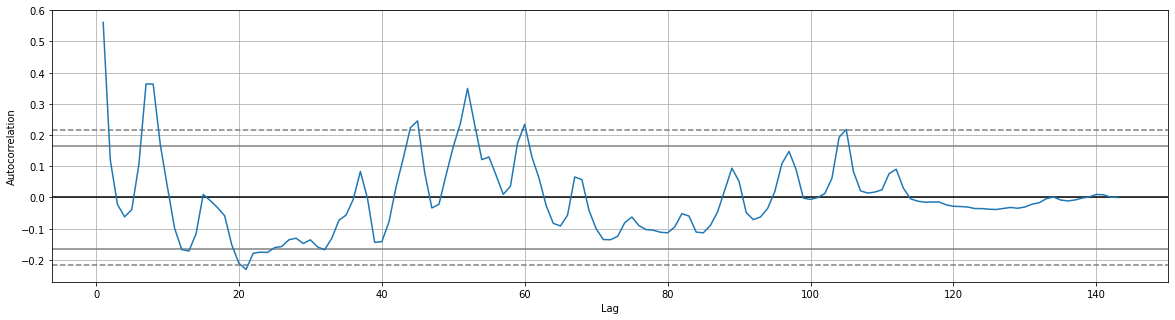

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(20, 5))
plot_acf(wal, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_pacf(wal, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
autocorrelation_plot(wal, ax=ax)
plt.show()

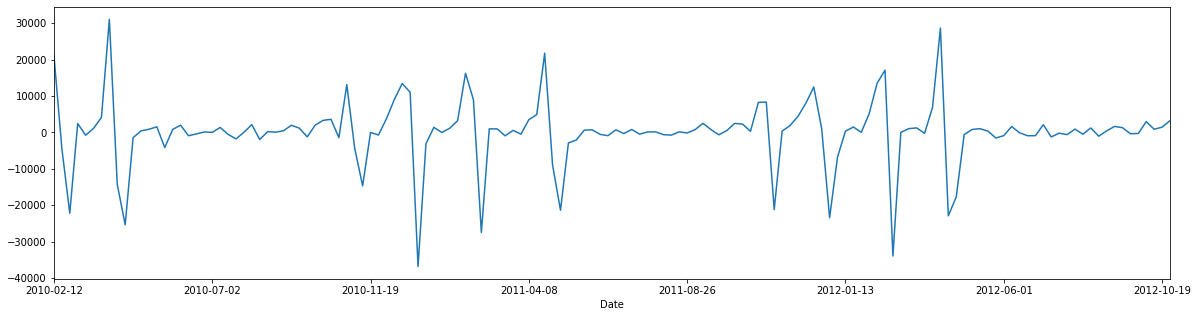

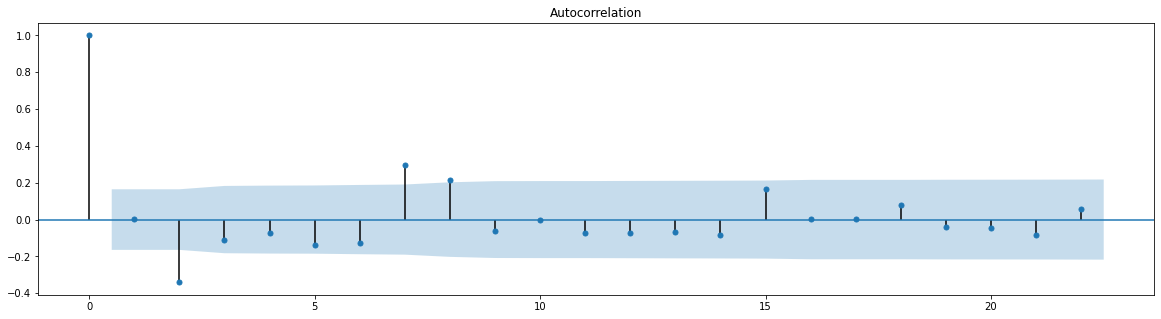

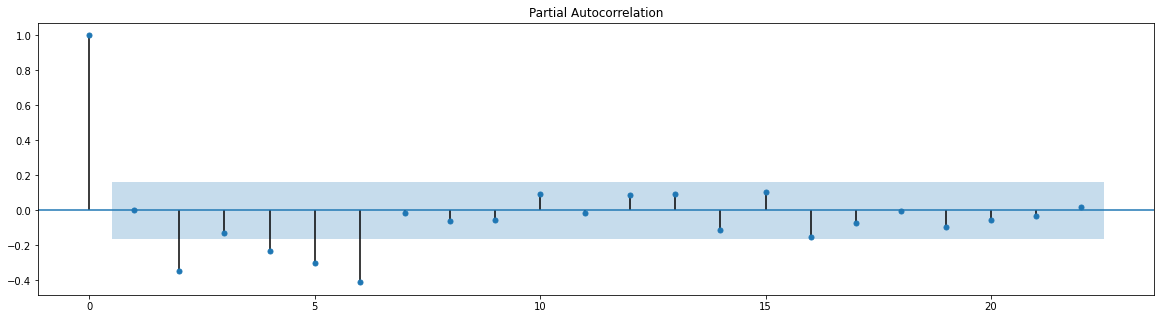

In [ ]:
#1차 차분해보기
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20, 5))
diff_1=wal.diff(periods=1).iloc[1:]
diff_1.plot(ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_acf(diff_1, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_pacf(diff_1, ax=ax)
plt.show()

arima(p,d,q)에서 p,d,q 결정이 어려워 R프로그래밍의 'auto.arima'함수를 사용하여 찾은 값을 이용하였음.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(wal, order=(3,0,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(3, 0)   Log Likelihood               -1483.754
Method:                       css-mle   S.D. of innovations           7746.151
Date:                Fri, 27 Mar 2020   AIC                           2977.508
Time:                        07:15:01   BIC                           2992.323
Sample:                    02-05-2010   HQIC                          2983.528
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.249e+04   1232.850     18.246      0.000    2.01e+04    2.49e+04
ar.L1.Weekly_Sales     0.7475      0.084      8.944      0.000       0.584       0.911
ar.L2.Weekly_Sales  

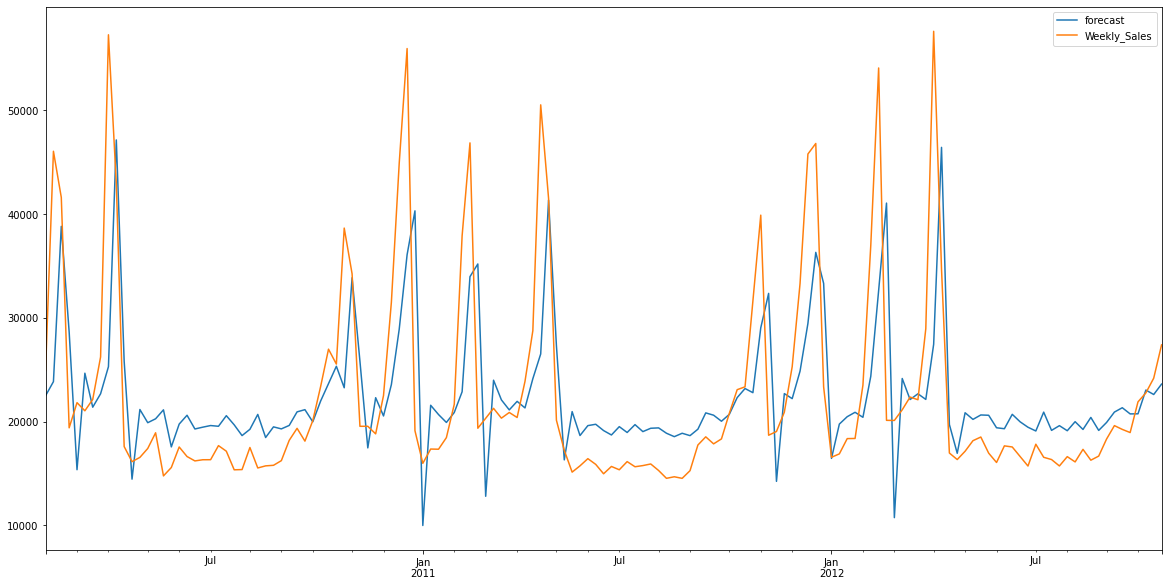

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
model_fit.plot_predict(ax=ax)
plt.show()

P>|z| 0.05이하로 만들기

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(wal, order=(3,0,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(3, 0)   Log Likelihood               -1499.121
Method:                       css-mle   S.D. of innovations           8570.857
Date:                Fri, 27 Mar 2020   AIC                           3006.242
Time:                        07:16:25   BIC                           3018.094
Sample:                    02-05-2010   HQIC                          3011.058
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ar.L1.Weekly_Sales     0.9824      0.080     12.268      0.000       0.825       1.139
ar.L2.Weekly_Sales    -0.3542      0.112     -3.152      0.002      -0.574      -0.134
ar.L3.Weekly_Sales  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


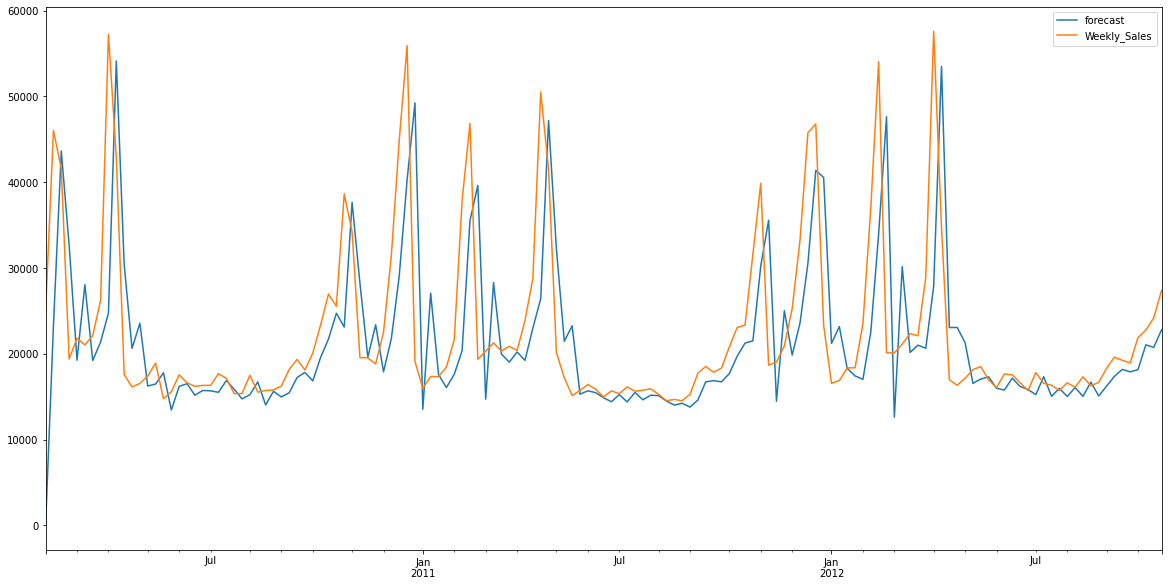

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
model_fit.plot_predict(ax=ax)
plt.show()

예측해보기

In [ ]:
forecast, stderr, conf_int = model_fit.forecast(steps=10)
print(forecast)

[25728.02693928 23420.11910122 22781.56889075 22432.27861779
 21566.61275711 20632.72375337 19908.54279755 19247.03935921
 18550.70361854 17865.97630233]
